<a href="https://colab.research.google.com/github/salsaagz/OSMnx-python-for-street-network/blob/main/scripts/extract-visualize-correct-save-analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install OSMNX**

In [ ]:
!pip install osmnx
import osmnx as ox

## **1. Get administrative place boundaries and shapefiles**

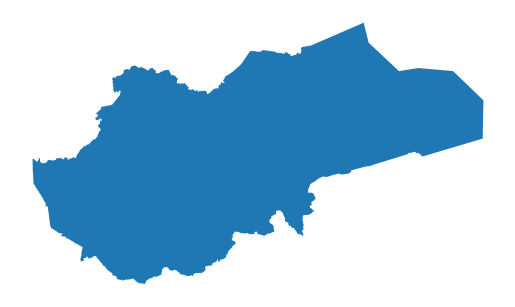

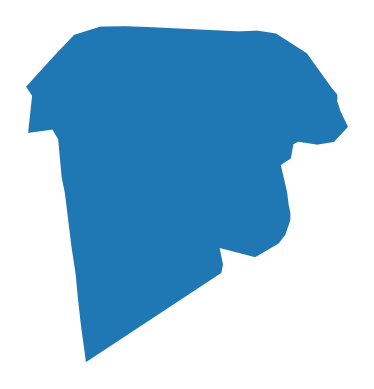

In [ ]:
import osmnx as ox
Provinsi = ox.geocode_to_gdf('Jambi, Indonesia')
Kota = ox.geocode_to_gdf('Sungai Penuh, Jambi')
# Kecamatan = ox.geocode_to_gdf('Pondok Tinggi, Sungai Penuh') Tidak bisa dilakukan untuk level kecamatan
ax = ox.project_gdf(Provinsi).plot()
bx = ox.project_gdf(Kota).plot()
_ = ax.axis('off')
_ = bx.axis('off')

**Get multiple places boundaries in single query**

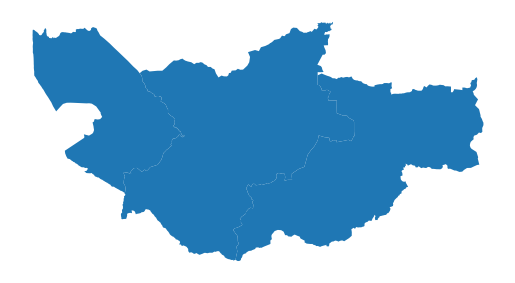

In [ ]:
places = ox.geocode_to_gdf(['Sarolangun', 'Merangin', 'Kerinci'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

## **2. Download and model street networks**

**2a) street network from bounding box**

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -1.59, 103.61000000000001, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

KeyboardInterrupt: ignored

**2b) street network from lat-long point**

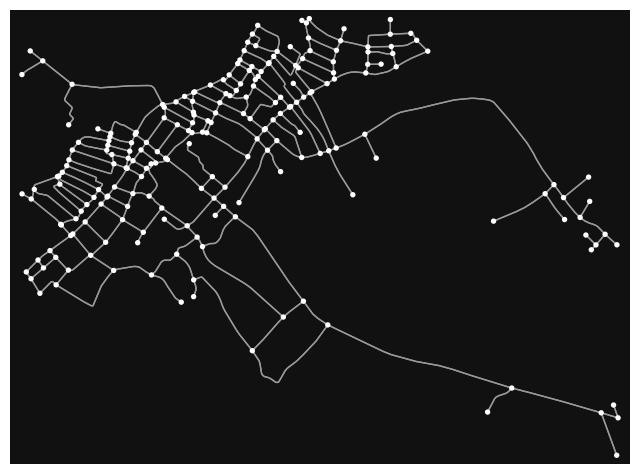

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_point((-2.083666332, 101.474664768), distance=750, network_type='all')
ox.plot_graph(G)

**2c) street network from address**

In [ ]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

**2d) street network from polygon**

In [ ]:
G = ox.graph_from_polygon(mission_shape, network_type='drive')
ox.plot_graph(G)

**2e) street network from place name**

In [ ]:
G = ox.graph_from_place('Los Angeles, California', network_type='drive')
ox.plot_graph(G)

**2f) multiple strret within a borough, county, state, or other geographic entity**

In [ ]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

**2g) street networks from all around the world**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 4.0 MB/s eta 0:00:00


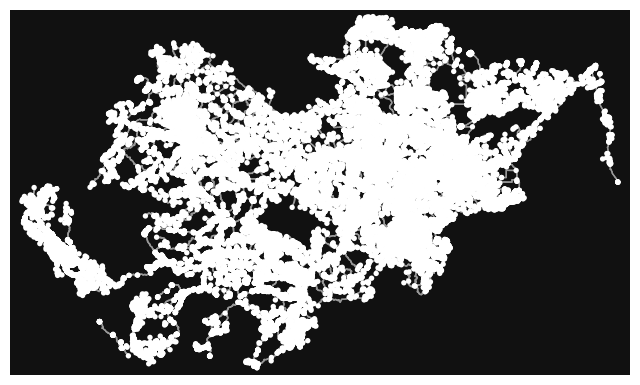

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Jambi, Indonesia')
ox.plot_graph(G)

In [ ]:
G = ox.graph_from_address('Maputo, Mozambique', distance=3000)
ox.plot_graph(G)

## **3. Correct and simplify network topology**

## **4. Save street networks to disk**

## **5. Analyze street networks**

In [ ]:
G = ox.graph_from_place('Santa Monica, California', network_type='walk')
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

In [ ]:
G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')
route = nx.shortest_path(G, orig, dest)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')